# Bank data analysis

The goal of your project is to create a robust classifier and use the data, where you will build a model that will recognize whether specific client will leave/unsubscribe the bank services.
Make feature engineering but also try differnet models in order to get as much accuracy as possible.




    

## Dataset Info

* CLIENTNUM
  - Client number. Unique identifier for the customer holding the account

* Attrition_Flag (This is your target variable!)
  - Internal event (customer activity) variable - if the account is closed then 1 else 0

* Customer_Age
  - Demographic variable - Customer's Age in Years

* Gender
  - Demographic variable - M=Male, F=Female

* Dependent_count
  - Demographic variable - Number of dependents

* Education_Level
  - Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)


* Marital_Status
  - Demographic variable - Married, Single, Divorced, Unknown

* Income_Category
  - Demographic variable - Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, > $120K, Unknown)


* Card_Category
  - Product Variable - Type of Card (Blue, Silver, Gold, Platinum)

* Months_on_book
  - Period of relationship with bank


* Total_Relationship_Count
  - Total no. of products held by the customer

* Months_Inactive_12_mon
  - No. of months inactive in the last 12 months

* Contacts_Count_12_mon
  - No. of Contacts in the last 12 months

* Credit_Limit
  - Credit Limit on the Credit Card

* Total_Revolving_Bal
  - Total Revolving Balance on the Credit Card

* Avg_Open_To_Buy
  - Open to Buy Credit Line (Average of last 12 months)

* Total_Amt_Chng_Q4_Q1
  - Change in Transaction Amount (Q4 over Q1)

* Total_Trans_Amt
  - Total Transaction Amount (Last 12 months)

* Total_Trans_Ct
  - Total Transaction Count (Last 12 months)

* Total_Ct_Chng_Q4_Q1
  - Change in Transaction Count (Q4 over Q1)

* Avg_Utilization_Ratio
  - Average Card Utilization Ratio




# Working Plan



1. Phase 1 : Dataset
    * Team Planning
    * Full git project Integration
    * General Project Research
    * Dataset Preparation
    * Dataset Feature Engineering

2. Phase 2 : Training
    * Make Research about your model
    * Compose your model (try different models) 
    * Ping Pong phase with Dataset feature engineers
    * Generate more data if needed
    * Fine tunning of your model

3. Phase 3 : Deployment
    * Perform benchmark (precision/recall), ROC curve
    * Model Deploy (Git)
    * Write git Readme.md file
    * Receive Feedback from PM

In [70]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.tree import DecisionTreeClassifier


from sklearn.model_selection import train_test_split
from sklearn.esemble import 


In [37]:
data = pd.read_csv('ChurnPrediction/churn-prediction.csv')

In [38]:
display(data)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,3.900000e+01,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,4.400000e+01,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,3.600000e+01,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,3.400000e+01,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,2.100000e+01,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,4.000000e+01,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,2.500000e+01,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,3.600000e+01,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,2.147484e+09,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [39]:
{column: list(data[column].unique()) for column in data.select_dtypes('object').columns}

{'Attrition_Flag': ['Existing Customer', 'Attrited Customer'],
 'Gender': ['M', 'F'],
 'Education_Level': ['High School',
  'Graduate',
  'Uneducated',
  'Unknown',
  'College',
  'Post-Graduate',
  'Doctorate'],
 'Marital_Status': ['Married', 'Single', 'Unknown', 'Divorced'],
 'Income_Category': ['$60K - $80K',
  'Less than $40K',
  '$80K - $120K',
  '$40K - $60K',
  '$120K +',
  'Unknown'],
 'Card_Category': ['Blue', 'Gold', 'Silver', 'Platinum']}

## 1. Data preprocessing, normalization, missing data, categorical data

In [55]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

def one_hot_encode(df, column, prefix):# found this function which is b
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=prefix)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

def preprocess_data(df, scale=False, one_hot=False):
    
    #drop ID - has only unique values
    df = df.drop('CLIENTNUM', axis=1)
    
    # handle unknown values
    df['Income_Category'] = df['Income_Category'].replace('Unknown', np.NaN)
    
    # Fill ordinal missing values with modes ( Income_Category column)
    df['Income_Category'] = df['Income_Category'].fillna('Less than $40K')
    

    #Ordinal Variables Encoding

    Income_Category_map = {
    'Less than $40K' : 0,
    '$40K - $60K'    : 1,
    '$60K - $80K'    : 2,
    '$80K - $120K'   : 3,
    '$120K +'        : 4
    
    }


    Card_Category_map = {
    'Blue'     : 0,
    'Silver'   : 1,
    'Gold'     : 2,
    'Platinum' : 3
    }


    Attrition_Flag_map = {
    'Existing Customer' : 0,
    'Attrited Customer' : 1
    }

    Education_Level_map = {
    'Uneducated'    : 0,
    'High School'   : 1,
    'College'       : 2,
    'Graduate'      : 3,
    'Post-Graduate' : 4,
    'Doctorate'     : 5,
    'Unknown'       : 6
    }
    Gender_Map = {
        'M' : 0,
        'F' : 1
    }

    df.loc[:, 'Income_Category'] = df['Income_Category'].map(Income_Category_map)
    
    df.loc[:, 'Attrition_Flag'] = df['Attrition_Flag'].map(Attrition_Flag_map)
    df.loc[:, 'Education_Level'] = df['Education_Level'].map(Education_Level_map)
    df.loc[:, 'Gender'] = df['Gender'].map(Gender_Map)
    
    #encoding using the function above creating + deleting old columns
    if one_hot == True:
        
        df = one_hot_encode(df, 'Marital_Status', prefix='MS')
        df = one_hot_encode(df, 'Card_Category', prefix='CC')
    else:
        df.loc[:, 'Card_Category'] = df['Card_Category'].map(Card_Category_map)
    
    # Label Encoder
    le = LabelEncoder()
    
    # the remaining categorical data are 'objects' as datatyes
    categ = [x for x in df.columns if df[x].dtype == 'object']
    
    #fit_transform on each categorical column
    for a in categ:
        df.loc[:, a]=le.fit_transform(df.loc[:,a])
        
        
    
    y = df.Attrition_Flag
    X = df.drop('Attrition_Flag', axis=1)
    
    #Scale X
    if scale == True:
        scaler = StandardScaler()
        X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
    
    
    return X, y

In [73]:
# UPDATED FUNCTION - set 2  paramaters to choose preferance of preprocessing 
# Set scale on TRUE to get scaled data
# Set one_hot on True to get Marital Status and CardCategory one hot encoded

#X, y = preprocess_data(data)
#X, y = preprocess_data(data, scale=False , one_hot=True)
X, y = preprocess_data(data, scale=False, one_hot=True)

In [74]:
X

,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,MS_Divorced,MS_Married,MS_Single,MS_Unknown,CC_Blue,CC_Gold,CC_Platinum,CC_Silver
0,45,0,3,1,2,3.900000e+01,5,1,3,12691.0,...,1.625,0.061,0,1,0,0,1,0,0,0
1,49,1,5,3,0,4.400000e+01,6,1,2,8256.0,...,3.714,0.105,0,0,1,0,1,0,0,0
2,51,0,3,3,3,3.600000e+01,4,1,0,3418.0,...,2.333,0.000,0,1,0,0,1,0,0,0
3,40,1,4,1,0,3.400000e+01,3,4,1,3313.0,...,2.333,0.760,0,0,0,1,1,0,0,0
4,40,0,3,0,2,2.100000e+01,5,1,0,4716.0,...,2.500,0.000,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,0,2,3,1,4.000000e+01,3,2,3,4003.0,...,0.857,0.462,0,0,1,0,1,0,0,0
10123,41,0,2,6,1,2.500000e+01,4,2,3,4277.0,...,0.683,0.511,1,0,0,0,1,0,0,0
10124,44,1,1,1,0,3.600000e+01,5,3,4,5409.0,...,0.818,0.000,0,1,0,0,1,0,0,0
10125,30,0,2,3,1,2.147484e+09,4,3,3,5281.0,...,0.722,0.000,0,0,0,1,1,0,0,0


Random Forrest Classifier

In [75]:
#X_train,X_test,train,y_test = train_test_split(X, y, test_size=0.2, random_state=42) #Not used because of the Kfold

In [130]:

# evaluate random forest algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

#Process data for Tree Based Alg.
X, y = preprocess_data(data, scale=False, one_hot=True)

clf = RandomForestClassifier(max_depth=8, random_state=1)
clf.fit(X, y)


cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

n_scores = cross_val_score(clf, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.944 (0.007)


Logistic Regression Classifier

In [98]:
from sklearn.linear_model import LogisticRegression

# We reprocess data in favour for the classification algorithm
X, y = preprocess_data(data , scale = True, one_hot= False)

LogReg_clf = LogisticRegression(random_state = 1)

#LogReg_clf.fit(X y)

#y_pred = LogReg_clf.predict(X_test)


n_scores = cross_val_score(LogReg_clf, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.905 (0.007)


Random Forrest > Logistic Regression

 DATA AUGMENTATION Balaceing data( I think )

In [126]:
import math
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import ADASYN

def smote(x, y):
    # Synthetic Minority Over-samping Technique
    # 
    # sampling_strategy: determines the portion of samples to 
    #                    generate with respect to the majority class
    # k_neighbors : number of neighbors to be considered for each sample
    
    # For this example, only 1% of minoirty samples are considered
    k_neighbors = math.ceil(sum(y) * 0.01)
      
    smote = SMOTE(sampling_strategy=1, 
                  k_neighbors=k_neighbors)
    x, y = smote.fit_resample(x, y)
    
    return x, y



In [127]:
X, y = preprocess_data(data, scale=False, one_hot=False)
X, y = smote(X, y)
X.shape , y.shape

((17000, 19), (17000,))

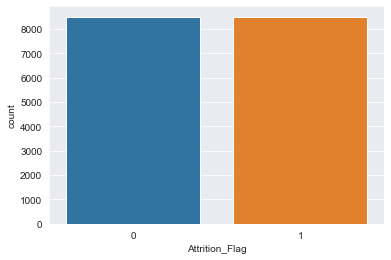

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns

#Check of the target has been balanced
sns.countplot(y)
plt.show()

## 2. Feature Anaysis, Extraction & Selection
(you may need to perform feature selection after creating default models and compare to them)

## 3. Classification models
- classical classification models
- deep neural networks

## 4. Evaluation and comparisons, various metrics

## 5. Hyperparameter Optimization

## 6. Final evaluations and comparisons
- the best model - analyze it in details, evaluate it with different train/test splits. Is it robust enough

## 7. Discussion, Concusions, Future improvements
- which features are the most important
- how will you explain the model to the management of the bank
- how much benefit/improvement should the bank expect